# Assignment 3

# Visualization Library
### Seaborn, ipywidgets, and IPython

#### Reasoning and Methodology
For the visuals, I chose `seaborn`. I found that this package has the most documentation and tutorials online. Since the graphics that I believe will best display meaningful information are relatively simple (such as a barplot), `seaborn` has more than enough customization functions.  I also found `seaborn` the most intuitive since it is built from `matplotlib`, which is what all of our coursework has used so far. 

For the interactivity, I chose `ipywidgets`. Using these widget builders with `seaborn` visuals is straightforward. Since I am only focusing on a few variables, it was reasonable to make a few widgets that apply to multiple visuals at once. The views on the dashboard are supposed to be compared with the same filter applied; by only making a few interactive widgets with `ipywidgets`, I minimize the risk of a reader misinterpreting results by comparing different data. 

In order to use `seaborn` and `ipywidgets` in tandem, I created a series of functions. The first few functions create the actual visuals. The next function, `create_dashboard()`, takes the same arguments as the visual creation functions and uses `display()` from `IPython` to effectively "paste" each visual. Utilizing functions is valuable because users can apply the dashboard-building methods to other datasets.

The last function, `create_interacivity()`, constructs the widgets and attaches the updated inputs to the arguments in `create_dashboard()`. 

#### Limitations
The modules I chose are not as customizable as others. I had a lot of trouble fitting the figures neatly into the space without using `sublots` from `matplotlib`, so I opted to use subplots anyway to complete the assignment (uh oh). This also limited the number of visuals I could put into the dashboard without effectively defining and rendering a second dashboard in the form of `create_dashboard2()` and `create_interactivity2()`. 

In addition, the dashboard itself does not look as "clean" as an end-stage dashboard (such as [this made with Shiny for Python](https://gallery.shinyapps.io/template-dashboard-tips1/)). 

### Considerations
Some adjustments I could make are the y-axis scales, annotations within each bar, and plot layout.

Adjusting the y-axis scales to zoom in or out of the graph can change the viers perspective and understanding of the differences between each bar. Zooming in could make the differences more extreme, but we run the risk of exaggerating how different the measures actually are. Zooming out could make the differences less obvious. 

The annotations with each bar are not very clear what they represent. I considered putting the sample size as a percentage of the total as an annotation on the vaccine rate barplot in order to incorporate the two measures, but I found it to be too confusing and opted to put the plots side-by-side. 

Another aspect I was adjusting was the layout of the plots. The arrangement should allow the user to make the most meaningful comparisons from the different visuals. The purpose of these visuals is to allow the viewer to compare the vaccine rates for each dimension to the sample sizes, and also to compare those rates to the overall vaccine rates. 

#### Other Approaches
I have experience using R Shiny, so I considered using Shiny for Python for this deliverable. However, it would require more research into creating visuals in Shiny for Python before I could use the more familiar `ui` and `server` methods. 

The `panel` package would have helped with the difficulties in placing the visuals in a nice arrangement. 

# Vaccination Coverage Among Youth in Pennyslvania
#### An Investigation into Vaccination Rates Across Dimensions: Race/Ethnicity, Urbanicity, and Insurance Coverage

As a data scientist in the heathcare space in Pennsylvania, I regularly view health data and investigate social determinants of health (SDOH). These refer to non-medial attributes that influence an individual's health and well-being, such as location, salary, and education. In thise case, I will look specifically at race and ethnicity, urbanicity, and insurance coverage. Another attribute that contributes to health and is frequently associated with SDOH is race and ethnicity [meta-analysis on race and SDOH](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-023-15274-x).

Vaccines have been a controversial topic since the first vaccine at the end of the 18th century. I want to investigate relationships between vaccine coverage and SDOH (including race and ethnicity) in my home state of Pennsylvania. 

#### About the Data
The data is sourced from [Centers for Disease Control and Prevention](https://data.cdc.gov/). It is a combination of [Vaccination Coverage among Adolescents (13-17 Years)](https://data.cdc.gov/Teen-Vaccinations/Vaccination-Coverage-among-Adolescents-13-17-Years/ee48-w5t6/about_data) and [Vaccination Coverage among Young Children (0-35 Months)](https://data.cdc.gov/Child-Vaccinations/Vaccination-Coverage-among-Young-Children-0-35-Mon/fhky-rtsk/about_data). The datasets contain information about estimated vaccine rates within selected sociodemographic characteristics; this dashboard focuses specifically on Race and Ethnicity, Urbanicity, and Insurance Coverage. 

#### Cleaning the Data
The two datasets have similar structure. They are both on the vaccine type, geography, dimension-level. The first step in cleaning the data is renaming columns so they match across both datasets. Then, the columns of interest are selected, and the data is joined using `pd.concat()`. Lastly, the data is filtered to only include `Geography = 'Pennsylvania'` and `Dimension Type = 'Race and Ethnicity' 'Urbanicity' or 'Insurance Coverage'`

The columns in the complete dataset are `Vaccine`, `Dimension Type`, `Dimension`, `Estimate (%)`, `95% CI (%)`, and `Sample Size`. 

Once creating the visuals, I filtered on `Dimension Type` and `Vaccine` within the functions to select the subsets of interest. 

# Demonstration

### Step 1: Data Setup

1. Load all of the libraries. 

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, Dropdown, IntRangeSlider, SelectMultiple, ToggleButtons
from IPython.display import display, clear_output

2. Read in the data to pandas dataframes with `read_csv`.

In [2]:
# read in data frames
teen = pd.read_csv('TeenVaccines.csv')
babies = pd.read_csv('BabiesVaccines.csv')

3. Print the columns for each dataset to understand the fields that are available and match

In [3]:
# look at columns
print(babies.columns)
print(teen.columns)

Index(['Vaccine', 'Dose', 'Geography Type', 'Geography',
       'Birth Year/Birth Cohort', 'Dimension Type', 'Dimension',
       'Estimate (%)', '95% CI (%)', 'Sample Size'],
      dtype='object')
Index(['Vaccine/Sample', 'Dose', 'Geography Type', 'Geography', 'Survey Year',
       'Dimension Type', 'Dimension', 'Estimate (%)', '95% CI (%)',
       'Sample Size'],
      dtype='object')


4. Adjust the datasets and prepare them for a row bind

In [4]:
# add age category
babies['Age Category'] = 'Babies'
teen['Age Category'] = 'Teen'
# order and enumerate age dimension

# babies = babies[~['Category'].isin(categories_to_exclude)]
# babies_age_order = ['0-3 Days','3 Months','5 Months','7 Months','8 Months','13 Months',
#                    '19 Months','24 Months','35 Months']


# rename columns for join
teen.rename(columns={'Vaccine/Sample': 'Vaccine'}, inplace=True)

In [5]:
# select columns of interest
df_cols = ['Age Category','Geography','Vaccine','Dimension Type','Dimension',
           'Estimate (%)','95% CI (%)','Sample Size','Geography Type']
babies = babies[df_cols]
teen = teen[df_cols]

5. Put the two datasets together and apply filters
In this case, we are filtering to only Pennsylvania and viewing three of the dimensions. 

In [6]:
# join data frames
vaccines_join = pd.concat([babies, teen])

# select dimensions of interest
dimensions = ['Insurance Coverage', 'Race and Ethnicity', 'Urbanicity','Overall']
vaccines = vaccines_join[vaccines_join['Geography'] == 'Pennsylvania']
vaccines = vaccines[vaccines['Dimension Type'].isin(dimensions)]

6. Display the top of the final dataframe

In [7]:
vaccines.head()

,Age Category,Geography,Vaccine,Dimension Type,Dimension,Estimate (%),95% CI (%),Sample Size,Geography Type
4558,Babies,Pennsylvania,PCV,Overall,Overall,93.0,91.0 to 95.1,1975.0,States/Local Areas
4560,Babies,Pennsylvania,PCV,Urbanicity,Living In a MSA Non-Principal City,94.5,91.8 to 97.2,945.0,States/Local Areas
4561,Babies,Pennsylvania,PCV,Urbanicity,Living In a Non-MSA,89.8,80.0 to 99.6,48.0,States/Local Areas
4566,Babies,Pennsylvania,Hep B,Race and Ethnicity,Hispanic,82.7,73.9 to 91.4,323.0,States/Local Areas
4567,Babies,Pennsylvania,Hep B,Race and Ethnicity,"Other or Multiple Races, Non-Hispanic",84.6,77.9 to 91.3,288.0,States/Local Areas


### Step 2: Create Views

In [8]:
# example filtered data frame
ex_df = vaccines.loc[(vaccines['Dimension Type'] == "Race and Ethnicity") &
                                    (vaccines['Vaccine'] == "PCV")]

1. The summary table view uses `pivot_table()` to extend the `Dimension` column into a view that has one row per dimension category. For example, if the user selected "Race and Ethnicity" dimension and "PCV" vaccine, there will be a row for each race and ethnicity and the corresponding vaccine coverage estimate and sample size. 

In [9]:
# create summary table for dimensions
def create_tab(df, index_cols=['Vaccine', 'Dimension'], pivot_col='Dimension Type',
                  est='Estimate (%)', dimension='Race and Ethnicity', vaccine='PCV',
              ss='Sample Size'):
    summary_tab_est = df.pivot_table(index=index_cols,
                                          values=est)
    summary_tab_ss = df.pivot_table(index=index_cols,
                                          values=ss)
    summary_tab = pd.merge(summary_tab_est, summary_tab_ss, on=index_cols, how='inner')

    return summary_tab

create_tab(ex_df)

Estimate (%)  Sample Size
Vaccine Dimension                                                       
PCV     Black, Non-Hispanic                            81.8        320.0
        Hispanic                                       91.4        323.0
        Other or Multiple Races, Non-Hispanic          90.2        288.0
        White, Non-Hispanic                            90.2       1044.0

2. The first barplot view shows the vaccine coverage estimate for each dimension category for the selected dimension and vaccine. Each category is a different color, and the point value is annotated in the middle of each bar. 

<Axes: title={'center': ' Rates'}, ylabel='Estimated Percentage Vaccinated'>

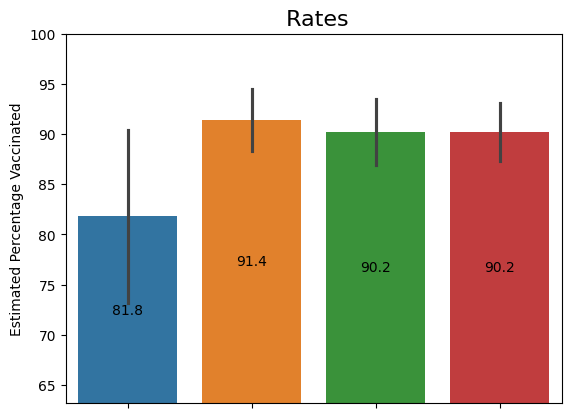

In [10]:
def create_barplot(df, dimension='Race and Ethnicity', est='Estimate (%)',
                   dimension_cat='Dimension', vaccine='PCV',
                  ax=None):
    dimension_cats = list(df[dimension_cat].unique())
    dimension_cats.sort()
    n_cats = len(dimension_cats)
    title =  " Rates"

    min_est = min(df[est])

    
    bar = sns.barplot(data=df, x=dimension_cat, y=est, hue=dimension_cat,
                     legend=False, hue_order=dimension_cats, order=dimension_cats,
                     ax=ax)
    sns.color_palette("hls", n_cats)
    bar.set_title(title, fontsize=16, color='black')
    bar.set_xlabel('')
    bar.set_ylabel('Estimated Percentage Vaccinated')
    bar.set_xticklabels(rotation=90, labels='')
    bar.set_ylim(min_est-10, 100)
    for container in bar.containers:
        bar.bar_label(container, label_type='center')

    return bar

create_barplot(ex_df)    

3. The second barplot view shows the sample size for each dimension category for the selected dimension and vaccine. Each category is a different color, and the point value is annotated in the middle of each bar. 

<Axes: title={'center': ' Sample Sizes'}, ylabel='Sample Size'>

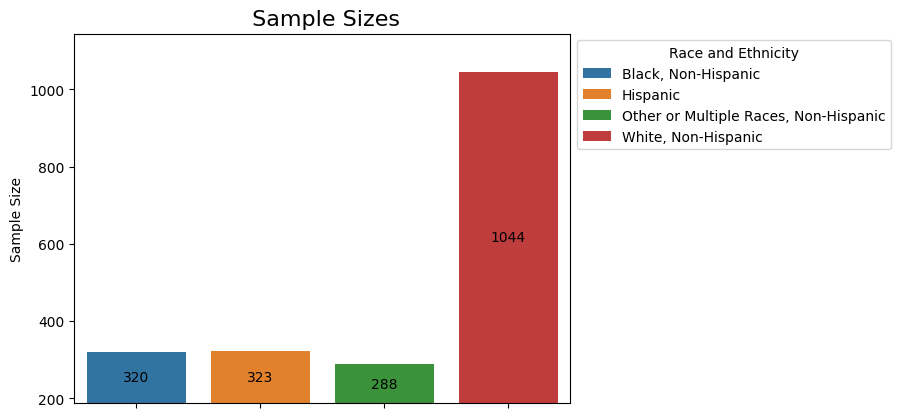

In [11]:
def create_samplesize(df, dimension='Race and Ethnicity', ss='Sample Size',
                     dimension_cat='Dimension', vaccine='PCV',
                     ax=None):
    dimension_cats = list(df[dimension_cat].unique())
    dimension_cats.sort()
    n_cats = len(dimension_cats)
    title =  " Sample Sizes"

    min_ss = min(df[ss])
    max_ss = max(df[ss])


    bar = sns.barplot(data=df, x=dimension_cat, y=ss, hue=dimension_cat,
                     legend='full', hue_order=dimension_cats, order=dimension_cats,
                     ax=ax)
    sns.color_palette("hls", n_cats)
    sns.move_legend(bar, title=dimension, loc="upper left", bbox_to_anchor=(1, 1))
    bar.set_title(title, fontsize=16, color='black')
    bar.set_xlabel('')
    bar.set_ylabel('Sample Size')
    bar.set_xticklabels(rotation=90, labels='')
    bar.set_ylim(min_ss-100, max_ss+100)
    for container in bar.containers:
        bar.bar_label(container, label_type='center')

    return bar

create_samplesize(ex_df)

<Axes: title={'center': 'Vaccination Rates Overall'}, xlabel='Vaccine', ylabel='Estimated Percentage Vaccinated'>

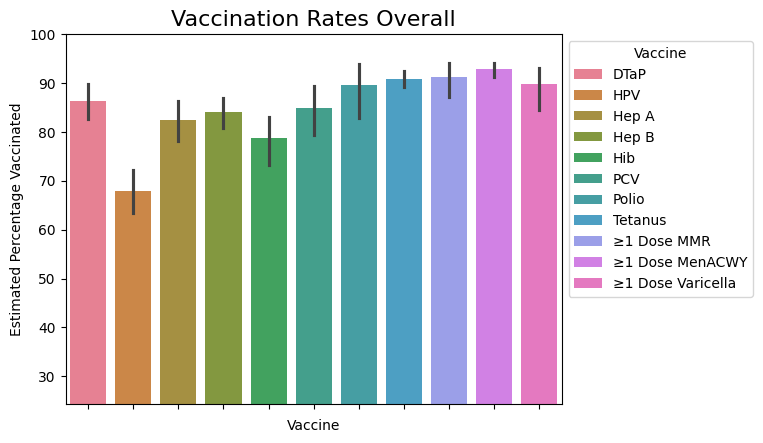

In [40]:
def create_overall(df, x='Vaccine', est='Estimate (%)', ax=None):
    dimension_cats = list(df[x].unique())
    dimension_cats.sort()
    n_cats = len(dimension_cats)

    min_est = min(df[est])

    bar = sns.barplot(data=df, x=x, y=est, hue=x,
                     legend='full', hue_order=dimension_cats,
                     order=dimension_cats, ax=ax)

    sns.color_palette("hls", n_cats)
    sns.move_legend(bar, title='Vaccine', loc="upper left", bbox_to_anchor=(1, 1))
    bar.set_title('Vaccination Rates Overall', fontsize=16, color='black')
    bar.set_xlabel('Vaccine')
    bar.set_ylabel('Estimated Percentage Vaccinated')
    bar.set_xticklabels(rotation=90, labels='')
    bar.set_ylim(min_est-10, 100)

    return bar

create_overall(vaccines)

4. The next function pastes the views from the previous functions into a dashboard.

*Note:* The `display` function is used to show the summary table because it is not a plot object. 

In [13]:
def create_dashboard(df, dimension='Race and Ethnicity', vaccine='PCV',
                     index_cols=['Vaccine', 'Dimension'], pivot_col='Dimension Type',
                     est = 'Estimate (%)', dimension_cat='Dimension', ss = 'Sample Size'):

    tab = create_tab(df, dimension=dimension, vaccine=vaccine)
    display(tab)
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=False)
    create_barplot(df, dimension=dimension, vaccine=vaccine, ax=axes[0])
    create_samplesize(df, dimension=dimension, vaccine=vaccine, ax=axes[1])
    

    plt.tight_layout()
    plt.show()

    create_overall(df=vaccines)
    plt.show()
    

# create_dashboard(ex_df)

5. The last function builds and implements the widgets for interactivity. The widgets to select `vaccine` and `dimension` update the filters applied to the dataframe that is passed into the `create_dashboard` function. 

In [38]:
def create_interactivity():
    # list the different dimensions we can select 
    dimension_list = list(vaccines['Dimension Type'].unique())
    dimension_list.remove('Overall')
    vaccine_list = list(vaccines['Vaccine'].unique())

    
    dimension_select = ToggleButtons(
        options=dimension_list,
        value='Race and Ethnicity',
        description='Select Dimension:',
        button_style='info'
    )

    vaccine_select = SelectMultiple(
        options=vaccine_list,
        value=['PCV'],
        description='Select vaccines (ctrl+click):',
        disabled=False,
        rows=11,
        style={'description_width': 'initial'}
        
    )


    def update(dimension, vaccine):
        filtered_df = vaccines.loc[(vaccines['Dimension Type'] == dimension) &
                                    (vaccines['Vaccine'].isin(vaccine))]

        clear_output(wait=True)

        create_dashboard(filtered_df, dimension, vaccine)


    interact(
        update,
        dimension=dimension_select,
        vaccine=vaccine_select
    )


In [41]:
create_interactivity()

interactive(children=(ToggleButtons(button_style='info', description='Select Dimension:', index=1, options=('U…

# Visualization Technique
### Barplots, summary table, and interactivity

The nature of the cleaned and formatted data is multiple categorical variables and two quantitative variables. To visualize this, I chose to use barplots and a summary table with interactive widgets to select subgroups and one or more vaccines. 

1. Select the subgroup with toggle buttons - this can be either Urbanicity (the type of city), Race/Ethnicity, or Insurance coverage. The purpose of this filtering option is to create more meaningful groups of the vaccine statistics.
2. Select one or more vaccines to view - a viewer can choose as many vaccines as desired, and the corresponding values are the average vaccination rates and total sample sizes.
3. Compare the subgroup vaccination rates and sample size views - the side-by-side barplots allow the reader to gain a better understanding of the vaccine rate metric by accounting for sample size. For example, White/Non-Hispanic race has the largest sample size, and the HPV vaccination rates are the lowest of the four race subgroups. This is an interesting note when comparing to other vaccines.
4. Compare the subgroup vaccination rates to the overall vaccination rates - the reader can gain insight into how different the vaccination rates in certain subgroups are from the general estimates. 
